In [1]:
import pandas as pd
import seaborn as sns
import warnings
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel('./BBDD_Hospitalización.xlsx')
# VARIABLE objetivo hospitalizados
df.shape

(570, 20)

In [3]:
# Understanding My Variables
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [4]:
# Print all rows with NaN values:
#df[df.isnull().any(axis=1)]
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [5]:
# Cleaning my dataset
# Drop only the rows which has all values NaN
df.dropna(axis=0, how='all', inplace = True)
print("There are {} missing values in the data.".format(df.isna().sum().sum())) 


There are 30 missing values in the data.


In [6]:
# Replace NaN values with 0 meaning have no cancer
df["PSA"].fillna(value=0, inplace=True) 

In [7]:
# Replacing nan values with "NO" meaning does no have any "AGENTE AISLADO"
df["AGENTE AISLADO"].fillna(value="NO", inplace=True)

In [8]:
df["HOSPITALIZACION"].fillna(value="NO", inplace=True)

In [9]:
df["BIOPSIAS PREVIAS"].fillna(value="NO", inplace=True)

In [10]:
df["ENF. CRONICA PULMONAR OBSTRUCTIVA"].fillna(value="NO", inplace=True)

In [11]:
df["CUP"].fillna(value="NO", inplace=True)

In [12]:
df["VOLUMEN PROSTATICO"].fillna(value="NO", inplace=True)

In [13]:
# NO NULL VALUES
df.isna().sum().sum()

0

In [14]:
# Normalize cols name
# df.rename(columns={'DIAS HOSPITALIZACIÓN UPC': "DIAS HOSPITALIZACION UPC", 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACION INFECCIOSA", 'HOSPITALIZACIÓN ULTIMO MES': 'HOSPITALIZACION ULTIMO MES'}, inplace=True)

In [15]:
df.tail()
#df.shape

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
563,67.0,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [16]:
# Normalize table names
#df.columns = [col_name.replace(".", "").replace(" ", " ") for col_name in df.columns]
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [17]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [18]:
""" le = preprocessing.LabelEncoder()

df["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = le.fit_transform(df["ENF. CRONICA PULMONAR OBSTRUCTIVA"])
df["ENF. CRONICA PULMONAR OBSTRUCTIVA"].unique()
 """

' le = preprocessing.LabelEncoder()\n\ndf["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = le.fit_transform(df["ENF. CRONICA PULMONAR OBSTRUCTIVA"])\ndf["ENF. CRONICA PULMONAR OBSTRUCTIVA"].unique()\n '

In [19]:
""" df["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = le.inverse_transform(df["ENF. CRONICA PULMONAR OBSTRUCTIVA"])
df["ENF. CRONICA PULMONAR OBSTRUCTIVA"].unique() """

' df["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = le.inverse_transform(df["ENF. CRONICA PULMONAR OBSTRUCTIVA"])\ndf["ENF. CRONICA PULMONAR OBSTRUCTIVA"].unique() '

In [20]:
cols = [
  "DIABETES",
  "HOSPITALIZACIÓN ULTIMO MES",
  "BIOPSIAS PREVIAS",
  "VOLUMEN PROSTATICO",
  "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS",
  "CUP",
  "ENF. CRONICA PULMONAR OBSTRUCTIVA",
  "BIOPSIA",
  "FIEBRE",
  "ITU",
  "TIPO DE CULTIVO",
  "AGENTE AISLADO",
  "PATRON DE RESISTENCIA",
  "HOSPITALIZACION",
]
#
#"NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACION INFECCIOSA",

In [21]:
#for col in cols:
#  print(df[col].unique())

In [22]:
# Transform variables categoricas a cuantitativas
le = preprocessing.LabelEncoder()

for col in cols:
  df[col] = le.fit_transform(df[col])

  #df_cleaned[col] = le.fit_transform(df[col])
  #print(df[col].unique())
  
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,0,0,4.0,0,1,1,12.0,0,0,9,1,1,0,2,1,2,1,2.0,0.0
1,56.0,0,0,7.7,0,1,1,12.0,0,0,9,1,1,0,2,1,2,1,5.0,0.0
2,57.0,0,0,29.0,1,1,1,24.0,0,0,9,1,1,0,0,0,0,1,4.0,3.0
3,56.0,0,0,7.0,0,1,1,12.0,0,0,9,1,1,0,2,1,2,1,5.0,0.0
4,55.0,0,0,29.0,1,1,1,24.0,0,0,9,1,1,0,0,0,2,1,4.0,3.0


In [23]:
#df["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = le.fit_transform(df["ENF. CRONICA PULMONAR OBSTRUCTIVA"])

In [24]:
df.describe()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,63.882042,0.110915,0.008803,13.177940,0.098592,0.71831,1.193662,12.996479,0.007042,0.056338,6.936620,0.065141,0.010563,1.996479,0.992958,2.003521,0.042254,0.165493,0.014085
std,9.281517,0.314304,0.093492,15.653058,0.298376,0.45022,0.928386,3.921180,0.083696,0.331203,2.776101,0.246992,0.102324,0.157095,0.118573,0.167947,0.201344,0.958066,0.196474
min,39.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,5.600000,0.000000,0.00000,1.000000,12.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,64.000000,0.000000,0.000000,8.000000,0.000000,1.00000,1.000000,12.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,69.000000,0.000000,0.000000,15.000000,0.000000,1.00000,1.000000,12.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
max,151.000000,1.000000,1.000000,100.000000,1.000000,1.00000,4.000000,24.000000,1.000000,3.000000,10.000000,1.000000,1.000000,3.000000,2.000000,4.000000,1.000000,12.000000,3.000000


In [25]:
#df.describe()
# Reemplazar los valores atípicos con el valor promedio
df['EDAD'] = df['EDAD'].apply(lambda x: df['EDAD'].mean() if x > 140 else x)

<Axes: >

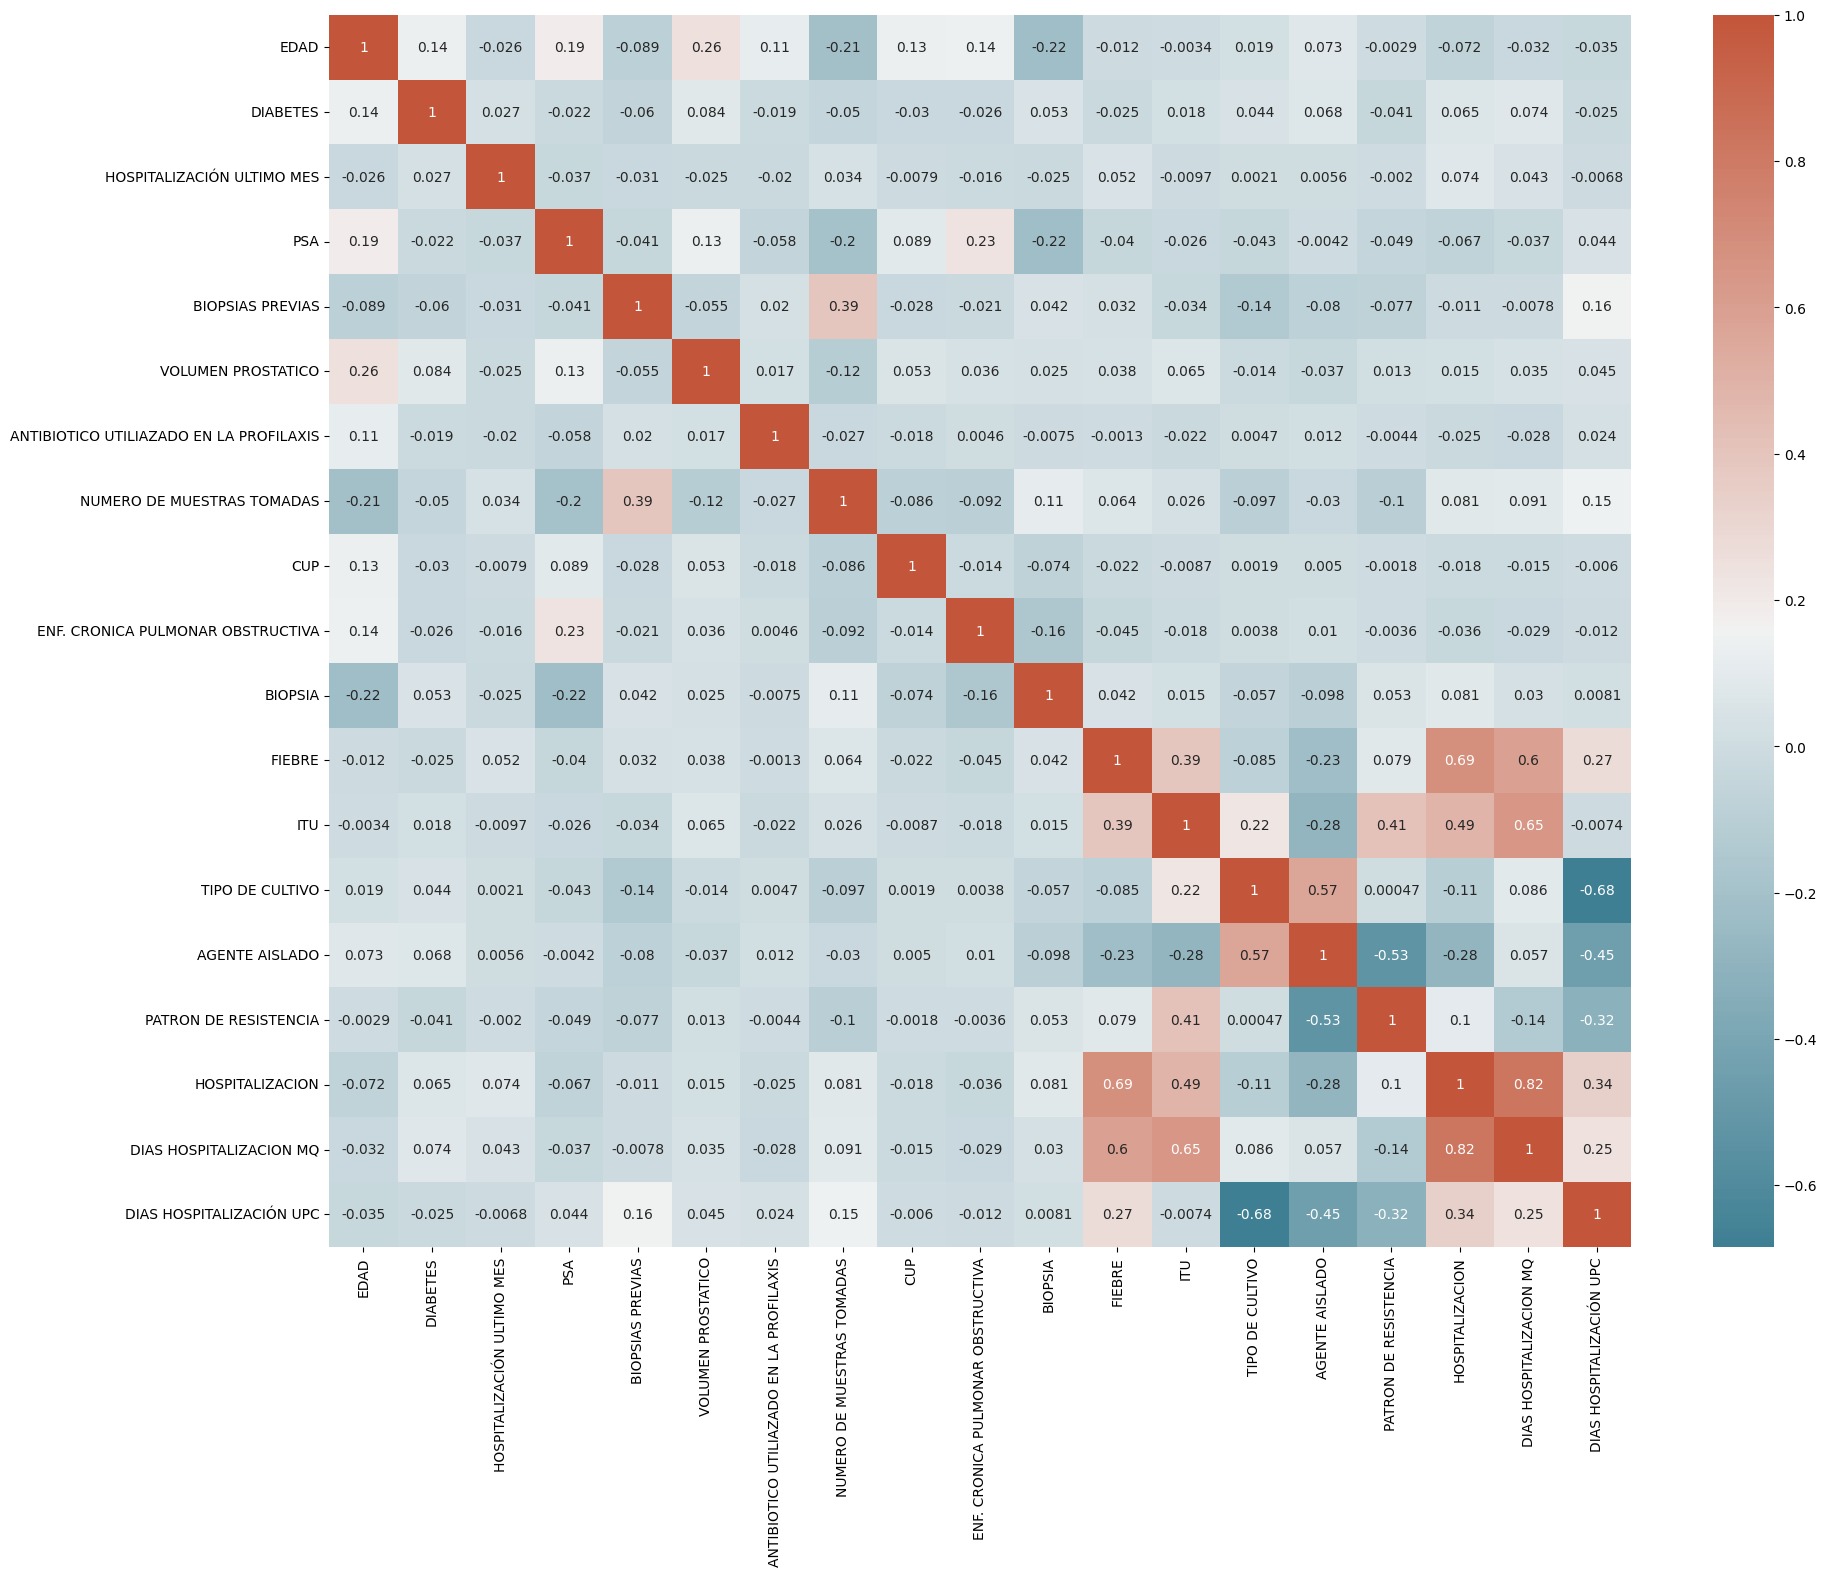

In [26]:
# Print our map of correlations by cols
plt.figure(figsize=(21,16))
#sns.boxplot(df)
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
# los pacietes quedan hospitalizados por fiebre e itu(infecciones tracto urinario)

Las cols mas importantes son: `ITU` y `FIEBRE` estas seran nuestro (**X**) y como variable objetivo (**y**) tenemos `target = "HOSPITALIZACION"`.

In [27]:
target = "HOSPITALIZACION"
X = df[["ITU","FIEBRE"]]
y = df[target]

# **Proporcion de clases**

In [28]:
# La clase se encuentra desequilibrada
class_counts = df["HOSPITALIZACION"].value_counts()
class_ratio = class_counts.max() / class_counts.min()
print('Proporción de clases:', class_ratio)

Proporción de clases: 22.666666666666668


# **Equilibrando clases**

In [29]:
from sklearn.utils import resample
# Dividir el conjunto de datos en clases
class_0 = df[df['HOSPITALIZACION'] == 0]
class_1 = df[df['HOSPITALIZACION'] == 1]
# Realizar muestreo aleatorio de cada clase
class_0_resampled = resample(class_0, replace=True, n_samples=100)
class_1_resampled = resample(class_1, replace=True, n_samples=100)
# Combinar las clases equilibradas en un conjunto de datos
balanced_data = pd.concat([class_0_resampled, class_1_resampled])


# **ACCURACY**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = balanced_data[["ITU","FIEBRE"]]
y = balanced_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9166666666666666


# **Precision**

In [31]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')
print("Precisión: ", precision)


Precisión:  0.95


# **Matriz de confusion**
               Actual
              +-------+-------+
              |   0   |   1   |
              +-------+-------+--------+----+
              |  TN   |  FP   | Predicted 0 |
              +-------+-------+--------+----+
              |  FN   |  TP   | Predicted 1 |
              +-------+-------+--------+----+


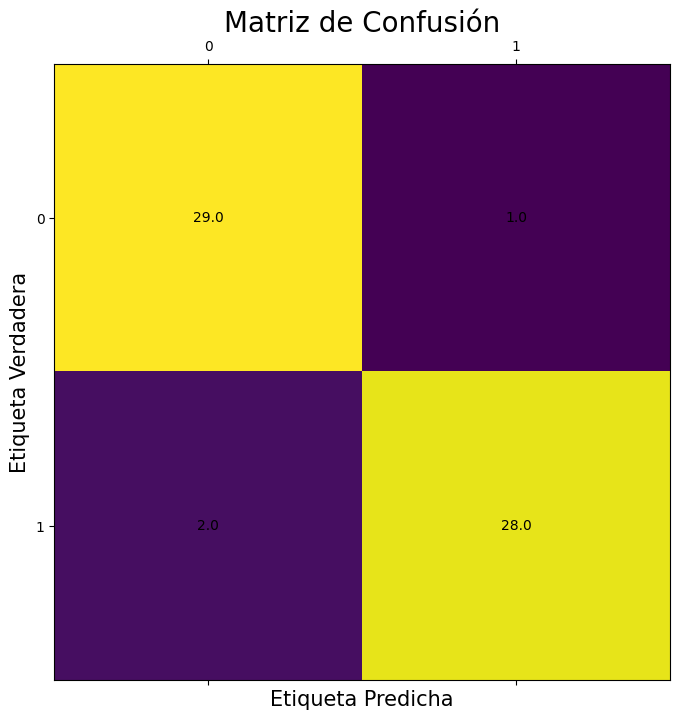

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

## Sensibilidad (recall) y el valor **F1_score**

In [33]:
from sklearn.metrics import precision_recall_fscore_support

cm2 = confusion_matrix(y_test, y_pred)
cm_array = np.array(cm2)
tn, fp, fn, tp = cm_array.ravel()
sensitivity = tp / (tp + fn)
sensitivity
# _, _, f1_score, _ = precision_recall_fscore_support(y_train, y_pred, average='binary')
# print("Sensibilidad:{}\nF1_Score: {}", sensitivity, f1_score)

0.9333333333333333

### **Reporte de clasificacion**

In [34]:
print(classification_report(y_test, y_pred))
#Precisión y Exhaustividad (recall)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



# **Validación cruzada**

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Realizamos la validación cruzada con 5 divisiones
scores = cross_val_score(model, X, y, cv=3)

# Mostramos el rendimiento de cada división y la media
print("Scores: ", scores)
print("Media: ", scores.mean())

Scores:  [0.      0.72725 0.     ]
Media:  0.24241666621543692


# **Vecinos más cercanos**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier
clf = KNeighborsClassifier()

In [37]:
clf.fit(X_train.values, y_train.values)

KNeighborsClassifier()

In [38]:
y_pred = clf.predict(X_test.values)

In [39]:
print(accuracy_score(y_test,y_pred))

0.95


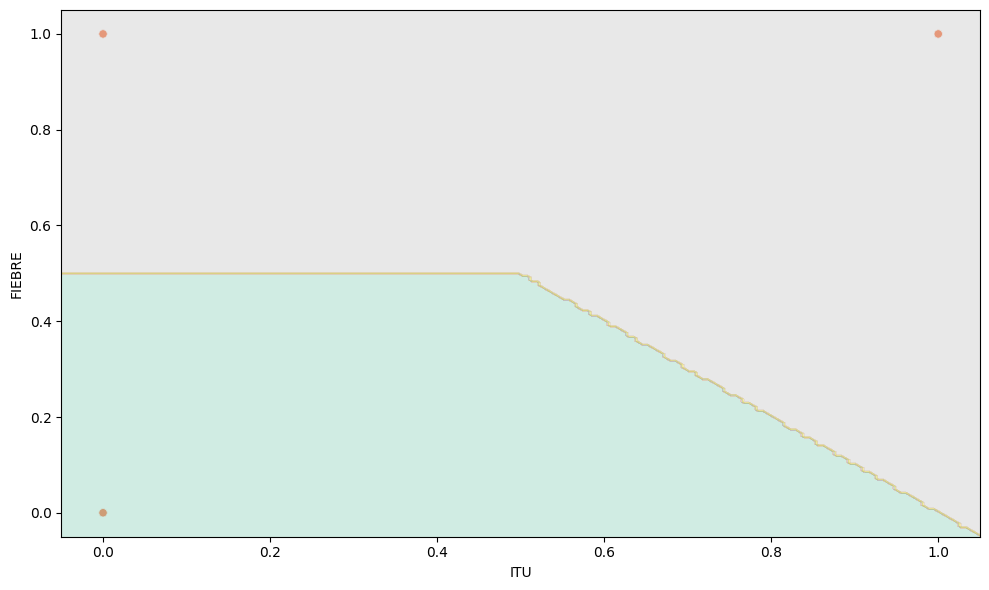

In [40]:
plt.figure(figsize= (10,6))
ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue=y, palette='Set2')
#ax = sns.scatterplot(x = X["ITU"], y = y, hue=y, palette='Set2')
plt.legend().remove()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
# plt.savefig('arbol_iris.png', dpi = 400)
plt.show()

In [41]:
balanced_data.to_csv('./cleaned_data.csv', encoding='utf-8', index=True)

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree


In [65]:
pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])


In [66]:
pipe_svm = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=100))])


In [67]:
pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [68]:
pipelines = [pipe_lr, pipe_svm, pipe_dt]
# Hacemos un diccionario para fines organizativos

pipe_dict = {0: 'Regresión Logística', 1: 'SVM', 2: 'Árbol de decisión'}


In [69]:
# Entrenamos

for pipe in pipelines:
	pipe.fit(X_train, y_train)
 
# Evaluamos
for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Regresión Logística pipeline accuracy en test: 0.950
SVM pipeline accuracy en test: 0.950
Árbol de decisión pipeline accuracy en test: 0.950


In [70]:
# Identificamos el mejor modelo para el set de testeo

best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

Modelo con el mejor accuracy: Regresión Logística


In [71]:
#Guardamos el pipeline en un archivo

import joblib #pickle es alternativa

joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Pipeline de %s guardado a archivo' % pipe_dict[best_clf])


Pipeline de Regresión Logística guardado a archivo


In [72]:
best_model = joblib.load('best_pipeline.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [73]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression(random_state=42))])

In [74]:
best_model.score(X_test, y_test)

0.95